In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (adjust path if needed)
df = pd.read_csv('../data/MachineLearningRating_v3.csv', delimiter='|')
# Display basic info
print(f"Dataset shape: {df.shape}")
display(df.head())

C:\Users\hp\AppData\Local\Temp\ipykernel_21424\823558820.py:7: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.csv', delimiter='|')


Dataset shape: (1000098, 52)


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Select numerical columns of interest (adjust column names accordingly)
numerical_cols = ['TotalPremium', 'TotalClaims']  # add more if needed

# Summary statistics including variability (std, variance)
display(df[numerical_cols].describe())
print("\nVariance:")
print(df[numerical_cols].var())

,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06
mean,6.190550e+01,6.486119e+01
std,2.302845e+02,2.384075e+03
min,-7.825768e+02,-1.200241e+04
25%,0.000000e+00,0.000000e+00
50%,2.178333e+00,0.000000e+00
75%,2.192982e+01,0.000000e+00
max,6.528260e+04,3.930921e+05



Variance:
TotalPremium    5.303096e+04
TotalClaims     5.683812e+06
dtype: float64


In [5]:
# Check data types of all columns
print(df.dtypes)

# Convert dates or categorical columns if necessary (example)
# df['DateColumn'] = pd.to_datetime(df['DateColumn'])
# df['CategoryColumn'] = df['CategoryColumn'].astype('category')

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [6]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

Missing values per column:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64


In [13]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display

# Example data generation (replace with your actual data)
np.random.seed(42)
# Simulate skewed TotalPremium data
data = np.concatenate([np.random.exponential(scale=50, size=1000), np.random.exponential(scale=5000, size=20)])
df = pd.DataFrame({'TotalPremium': data})

# Function to create clipped histogram plot
def plot_clipped_histogram(max_clip):
    filtered_df = df[df['TotalPremium'] <= max_clip]
    fig = px.histogram(filtered_df, x='TotalPremium', nbins=50,
                       title=f'Distribution of TotalPremium (Clipped at {max_clip:.0f})',
                       labels={'TotalPremium': 'TotalPremium'})
    fig.update_layout(bargap=0.1)
    fig.show()

# Create interactive slider widget
slider = widgets.FloatLogSlider(
    value=1000,
    base=10,
    min=1,  # 10^1 = 10
    max=5,  # 10^5 = 100,000
    step=0.1,
    description='Max Clip:',
    continuous_update=False,
    readout_format='.0f',
)

# Link slider to plotting function
widgets.interact(plot_clipped_histogram, max_clip=slider)

interactive(children=(FloatLogSlider(value=1000.0, continuous_update=False, description='Max Clip:', max=5.0, …

<function __main__.plot_clipped_histogram(max_clip)>

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import widgets
from IPython.display import display

# Example data generation (replace with your actual data)
np.random.seed(42)
# Simulate skewed TotalClaims data
data = np.concatenate([np.random.exponential(scale=50, size=1000), np.random.exponential(scale=5000, size=20)])
df = pd.DataFrame({'TotalClaims': data})

# Function to create clipped histogram plot
def plot_clipped_histogram(max_clip):
    filtered_df = df[df['TotalClaims'] <= max_clip]
    fig = px.histogram(filtered_df, x='TotalClaims', nbins=50,
                       title=f'Distribution of TotalClaims (Clipped at {max_clip:.0f})',
                       labels={'TotalClaims': 'TotalClaims'})
    fig.update_layout(bargap=0.1)
    fig.show()

# Create interactive slider widget
slider = widgets.FloatLogSlider(
    value=1000,
    base=10,
    min=1,  # 10^1 = 10
    max=5,  # 10^5 = 100,000
    step=0.1,
    description='Max Clip:',
    continuous_update=False,
    readout_format='.0f',
)

# Link slider to plotting function
widgets.interact(plot_clipped_histogram, max_clip=slider)

interactive(children=(FloatLogSlider(value=1000.0, continuous_update=False, description='Max Clip:', max=5.0, …

<function __main__.plot_clipped_histogram(max_clip)>

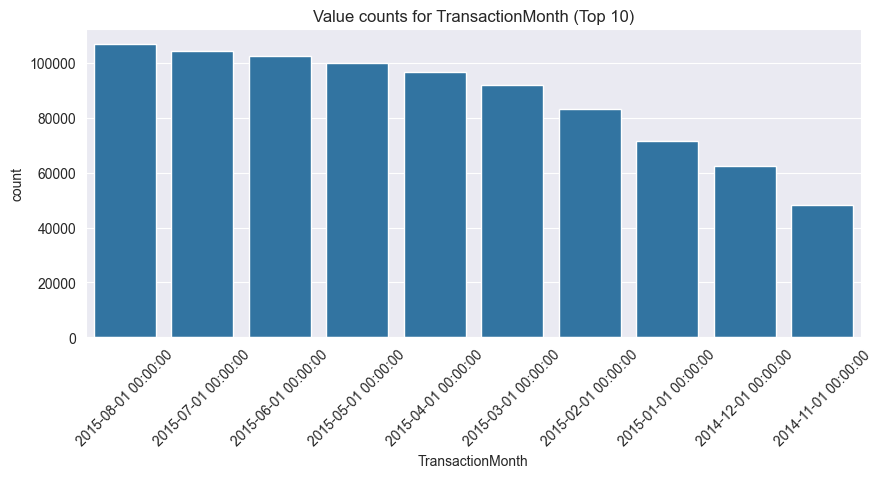

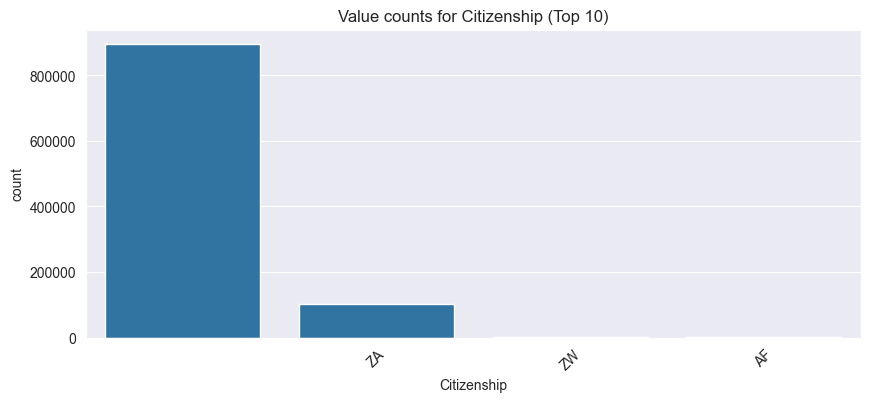

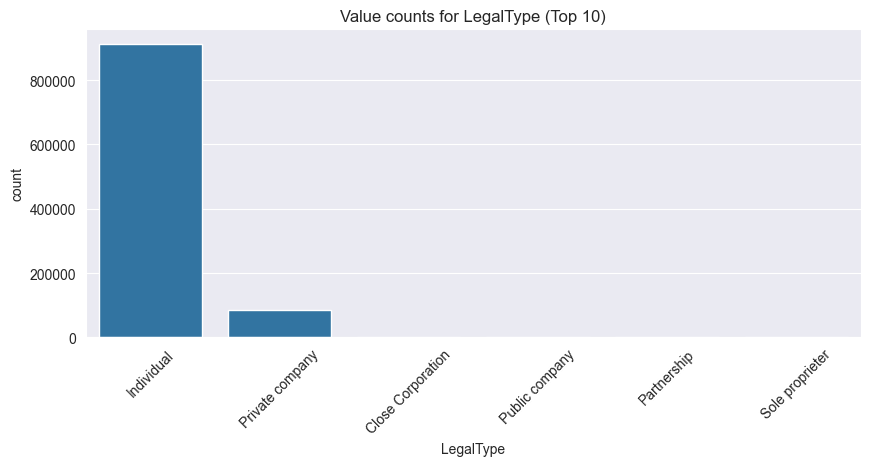

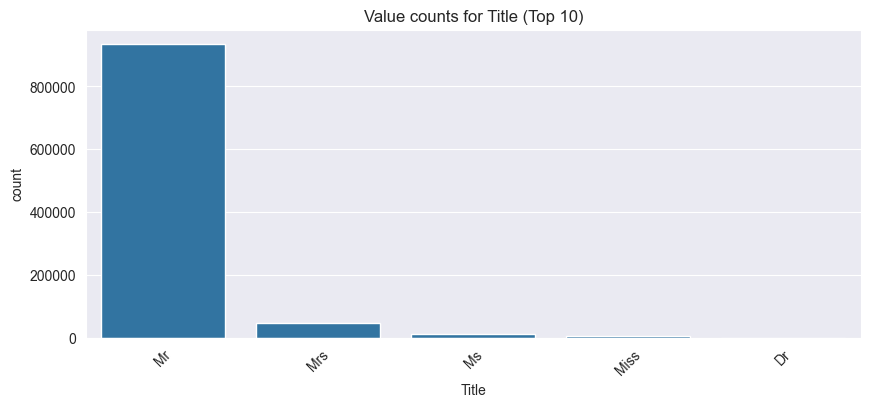

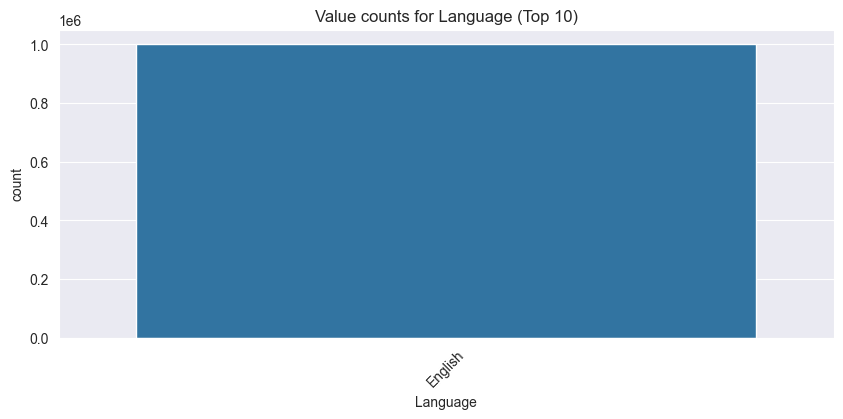

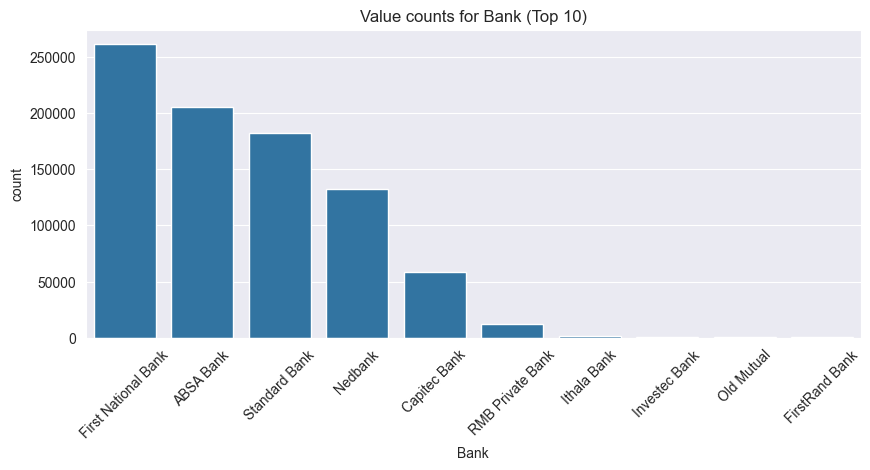

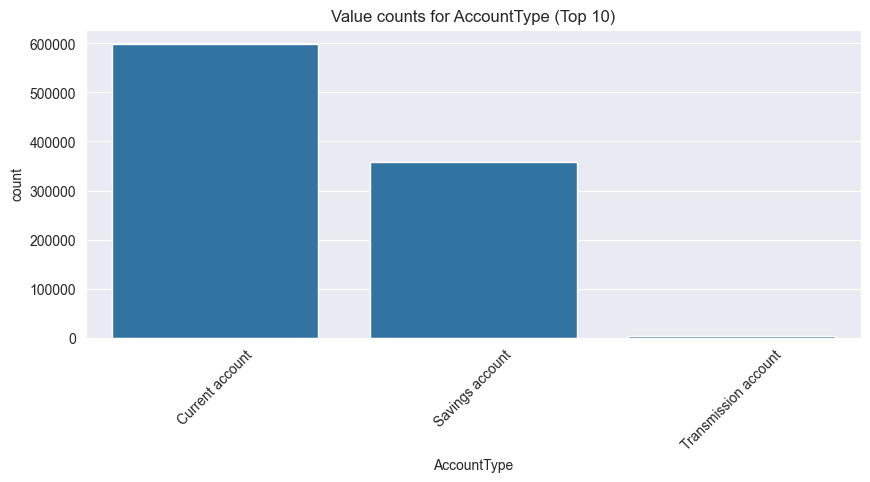

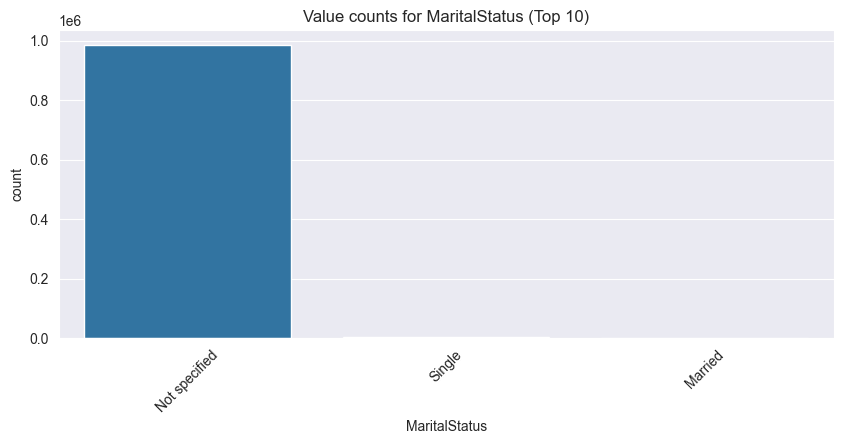

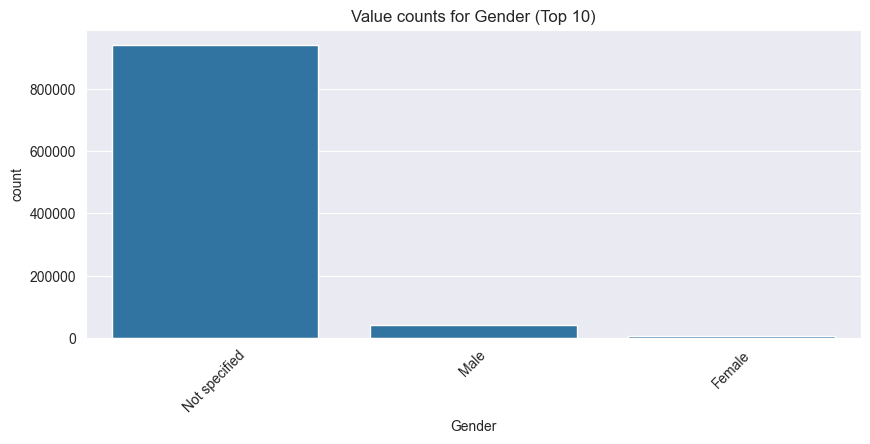

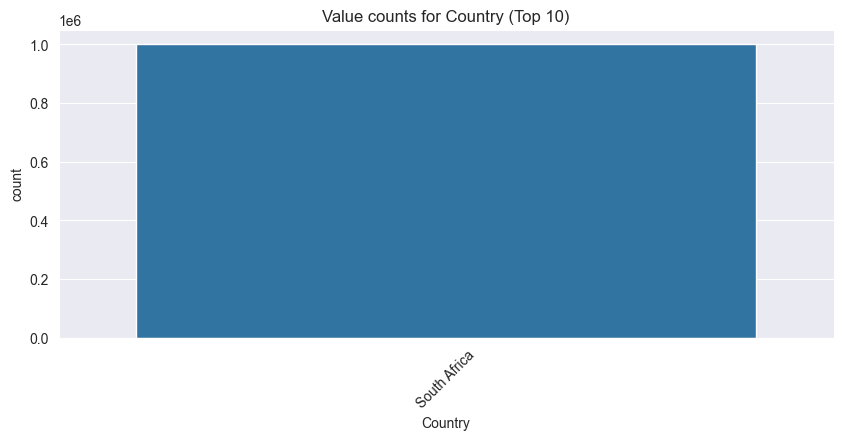

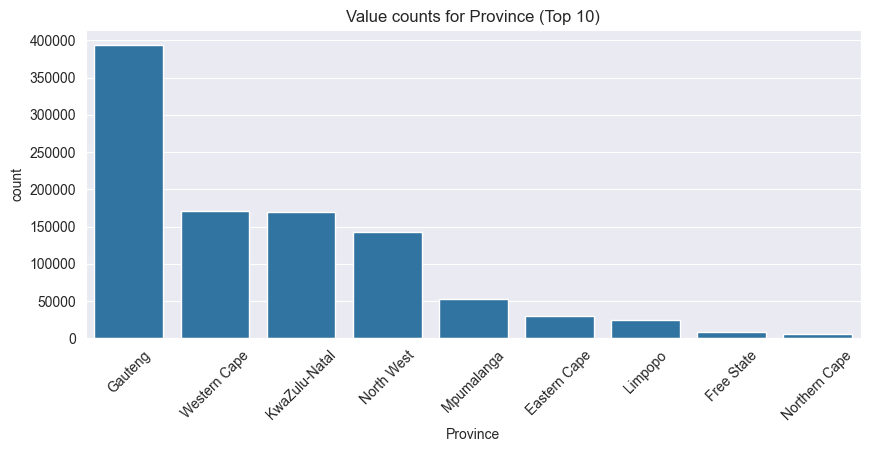

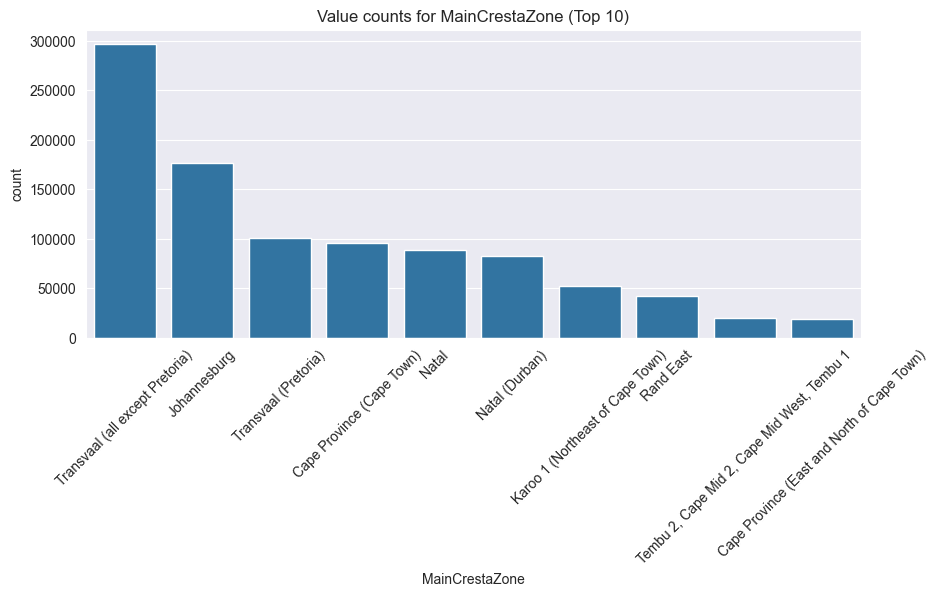

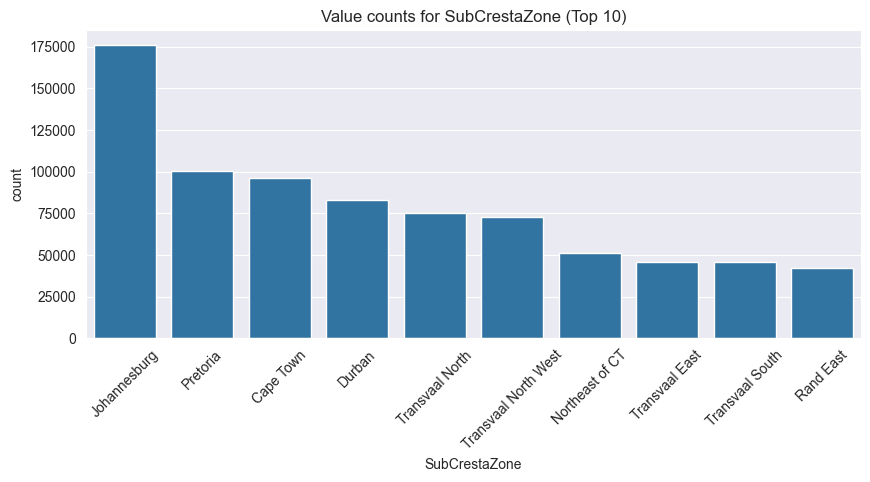

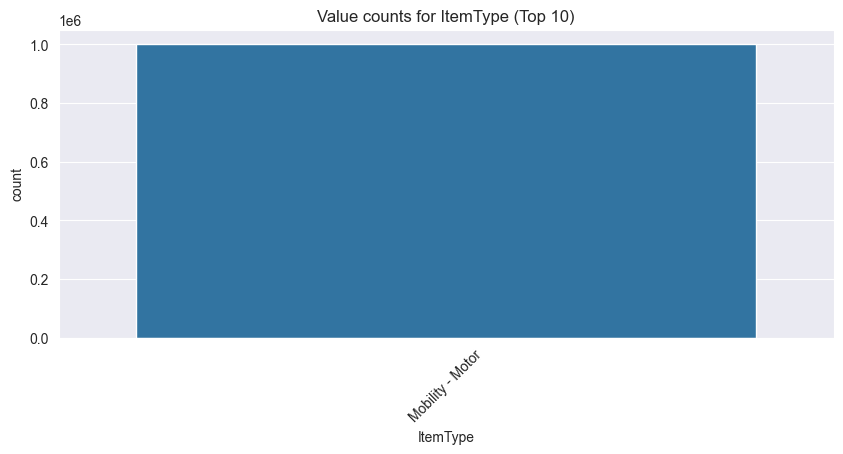

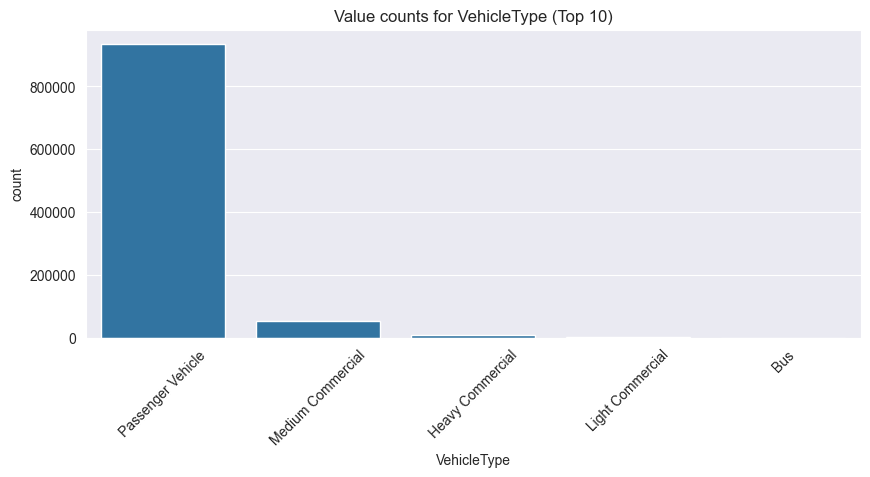

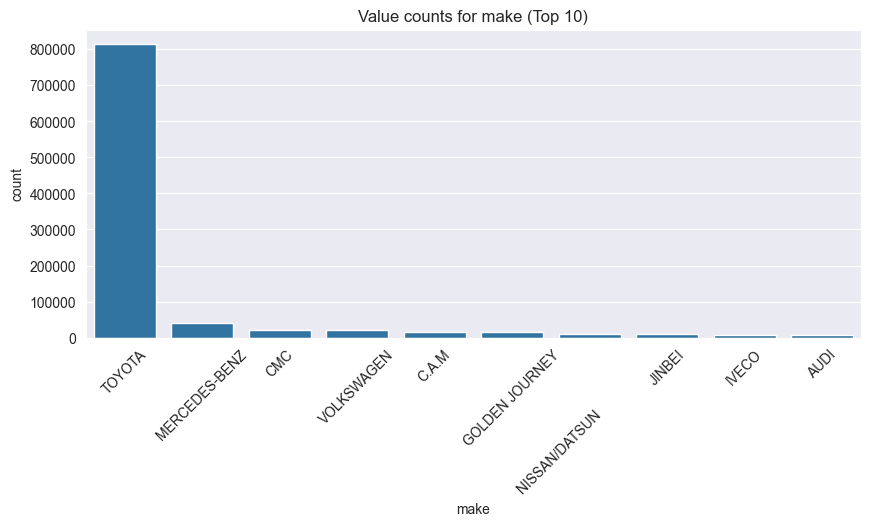

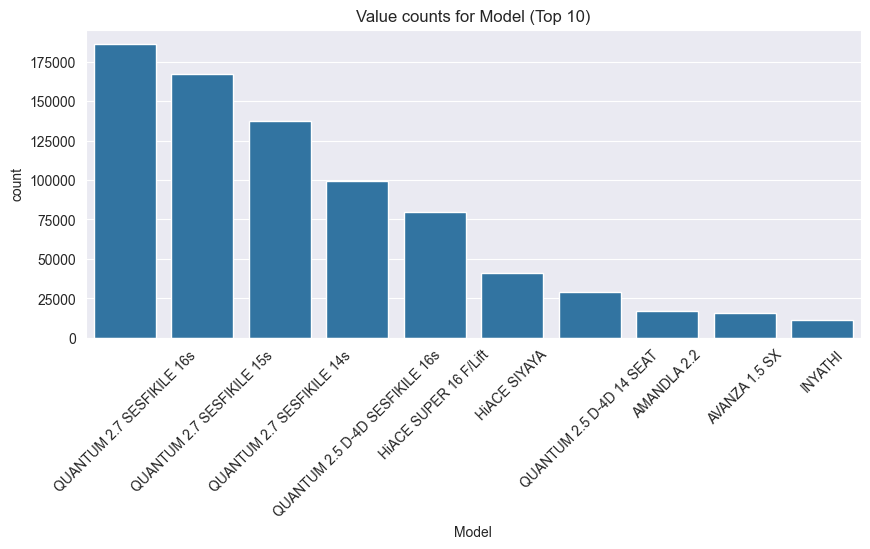

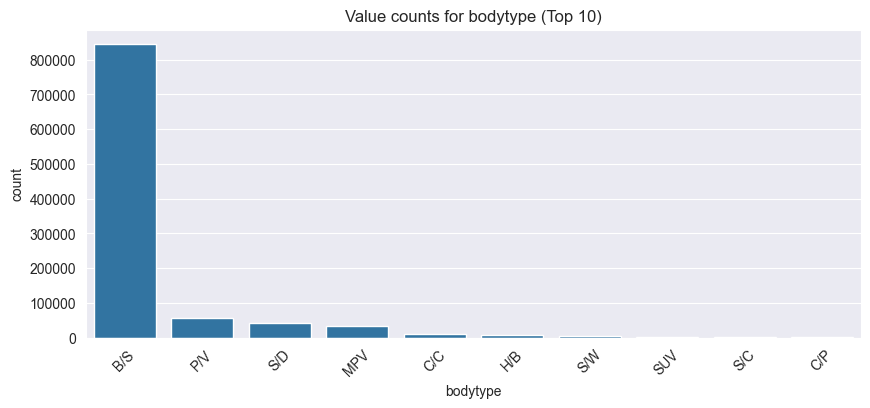

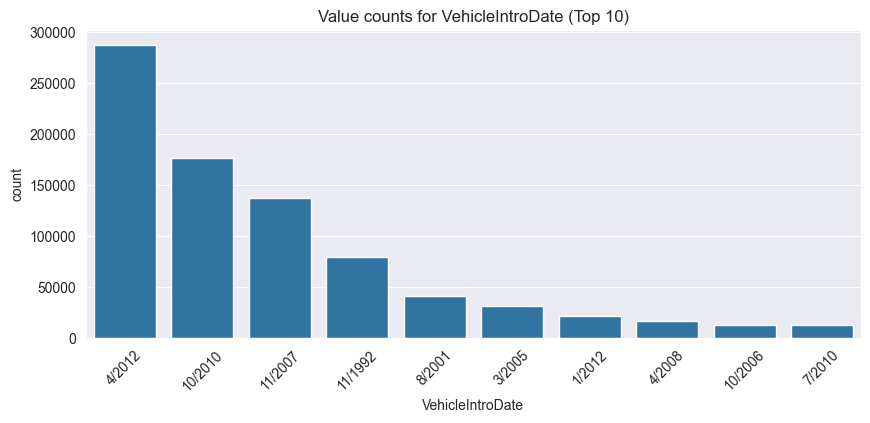

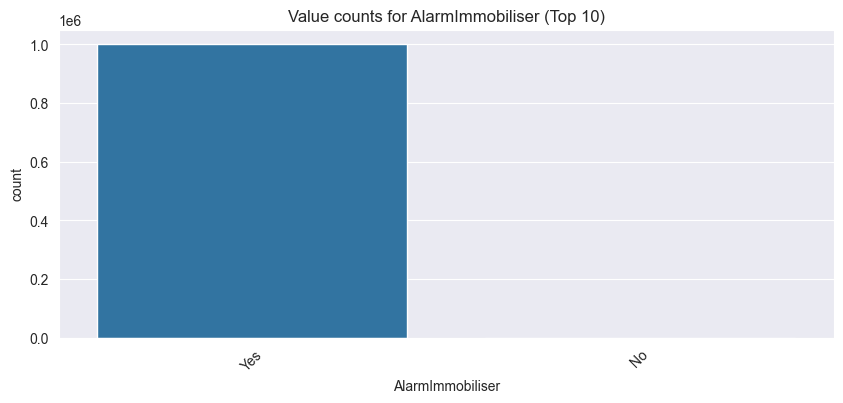

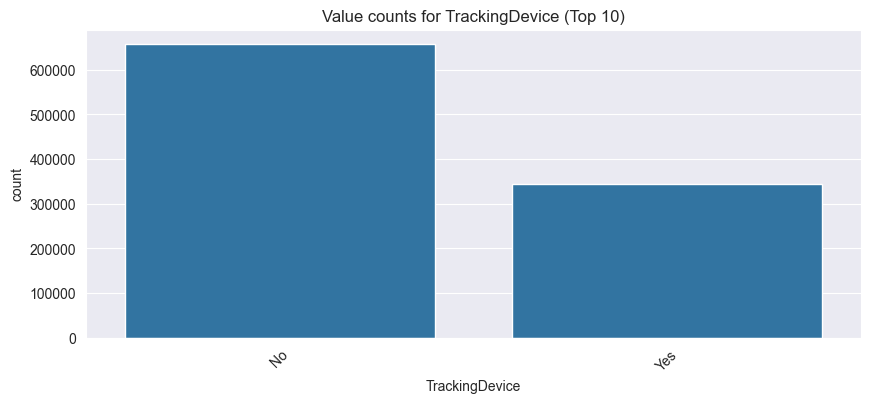

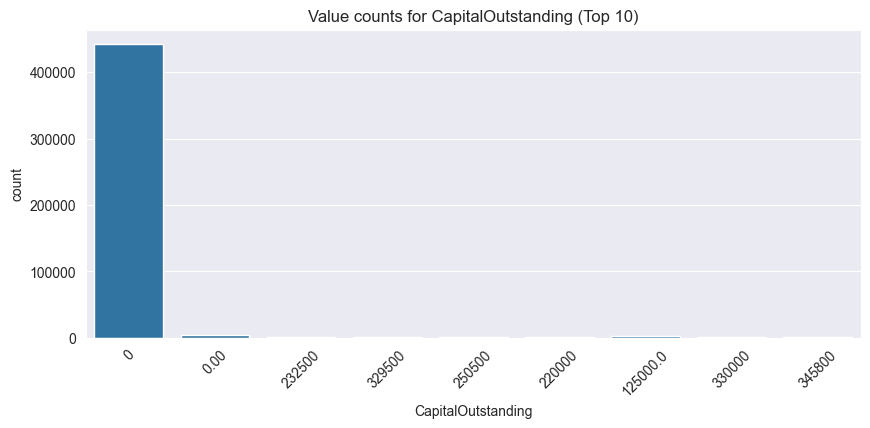

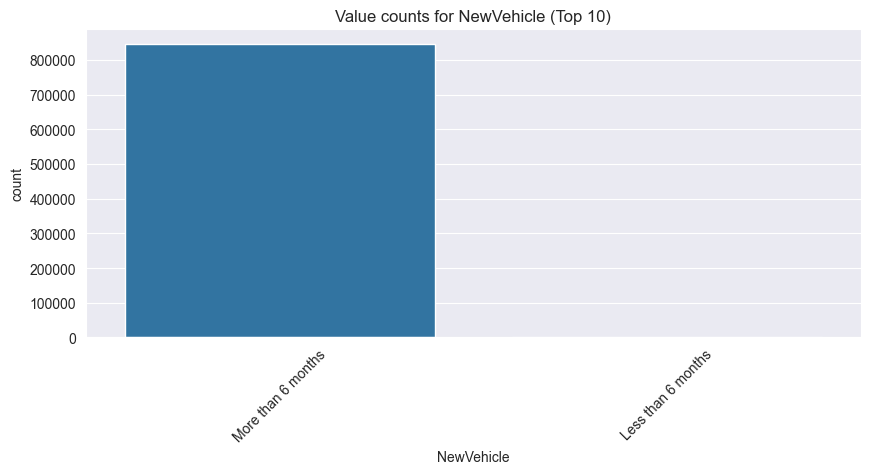

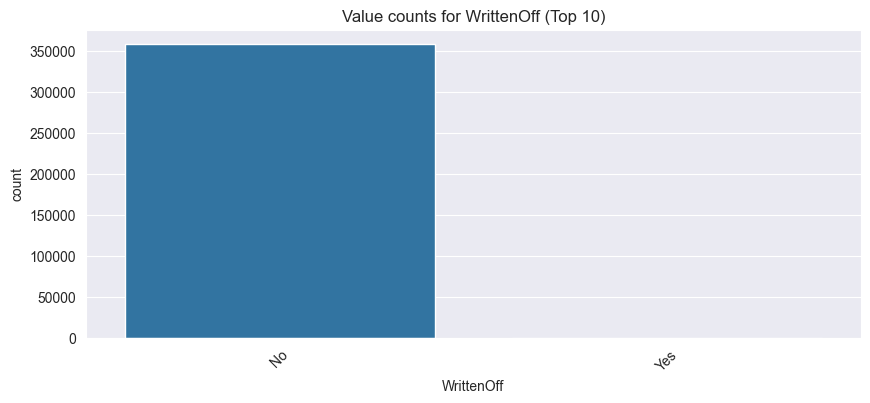

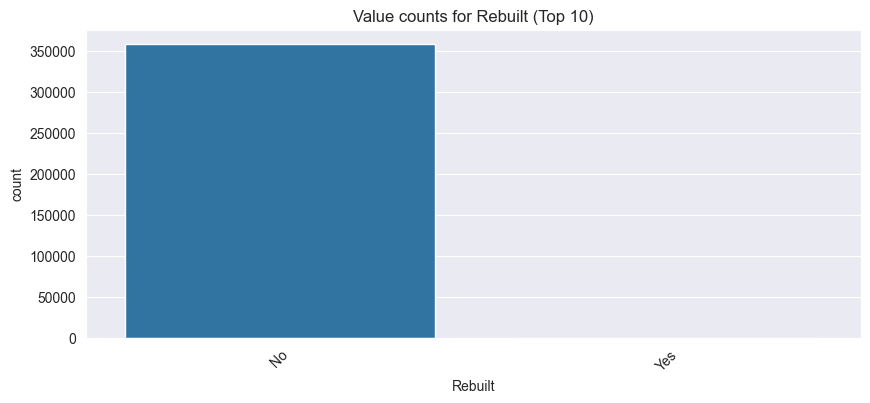

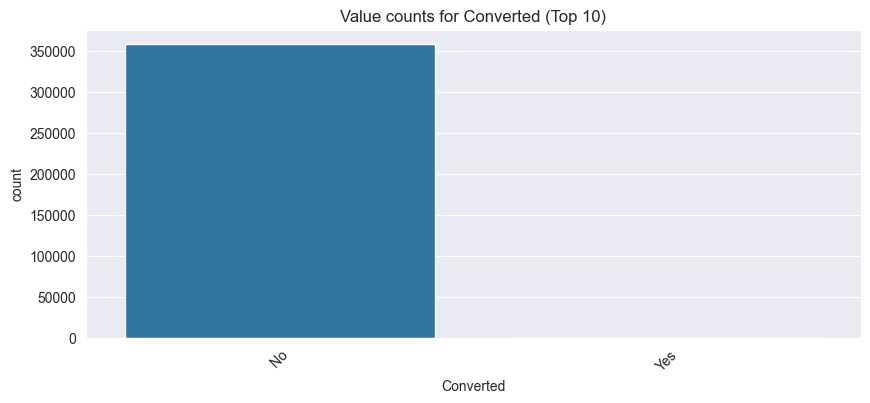

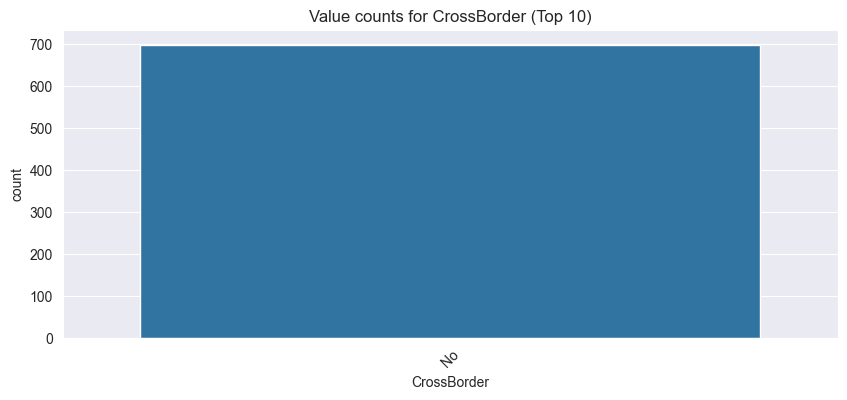

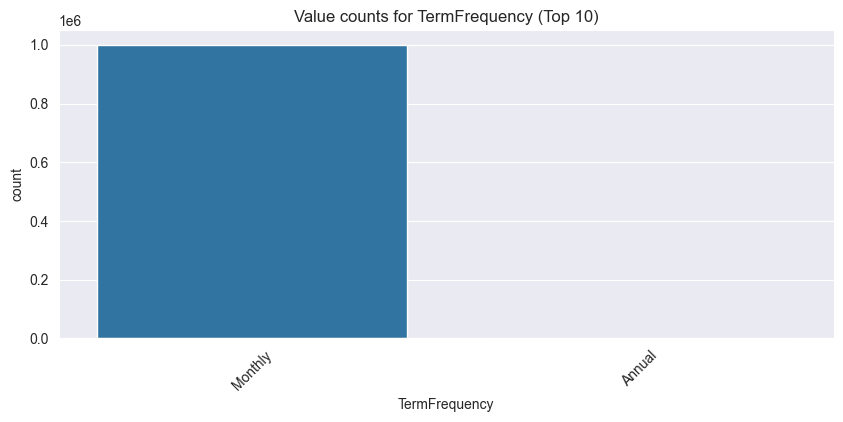

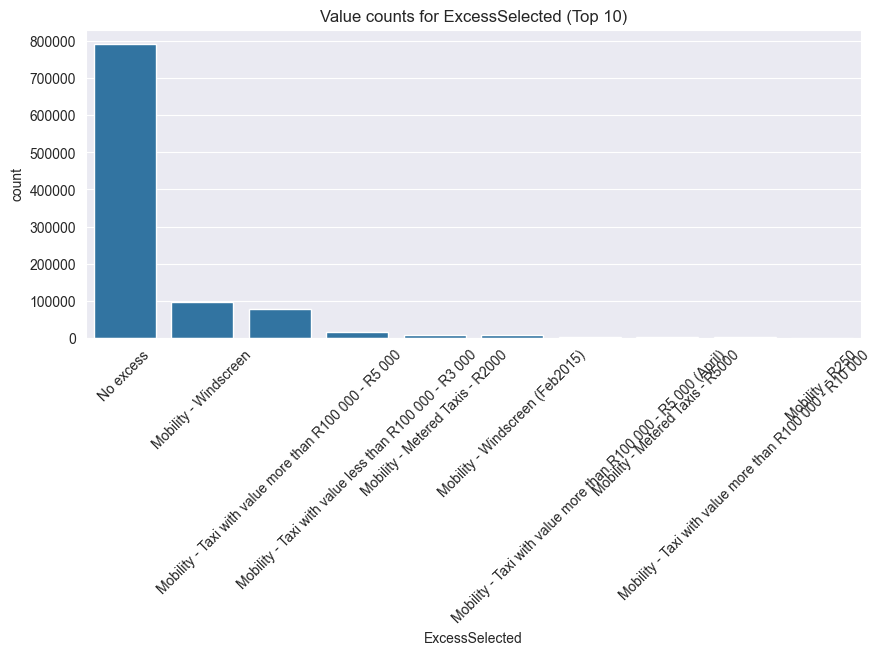

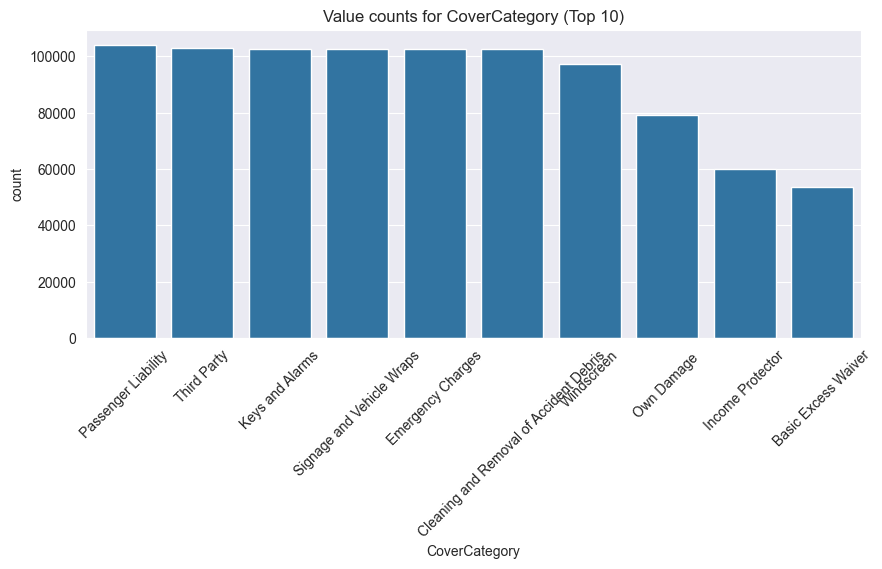

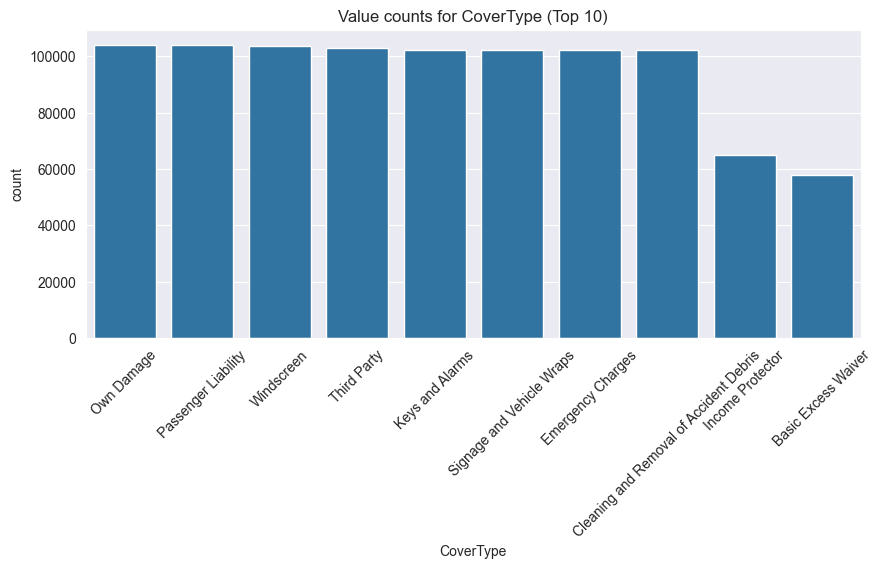

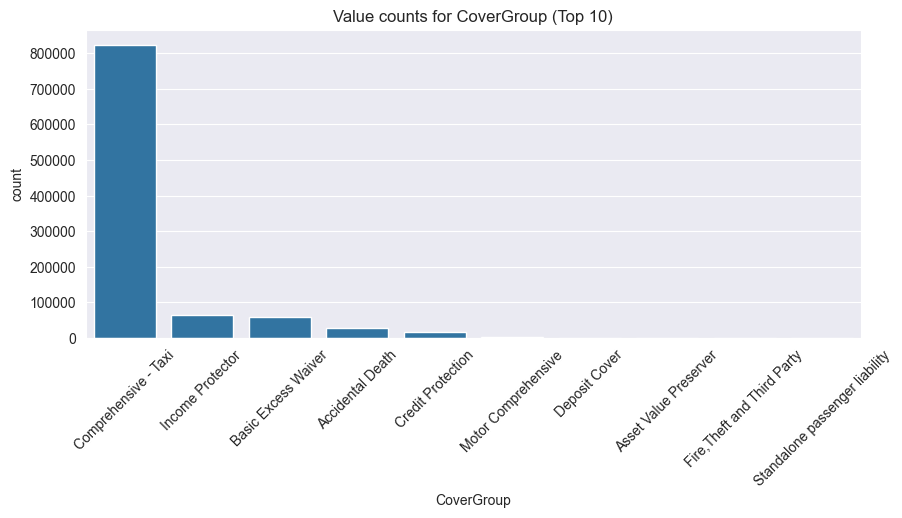

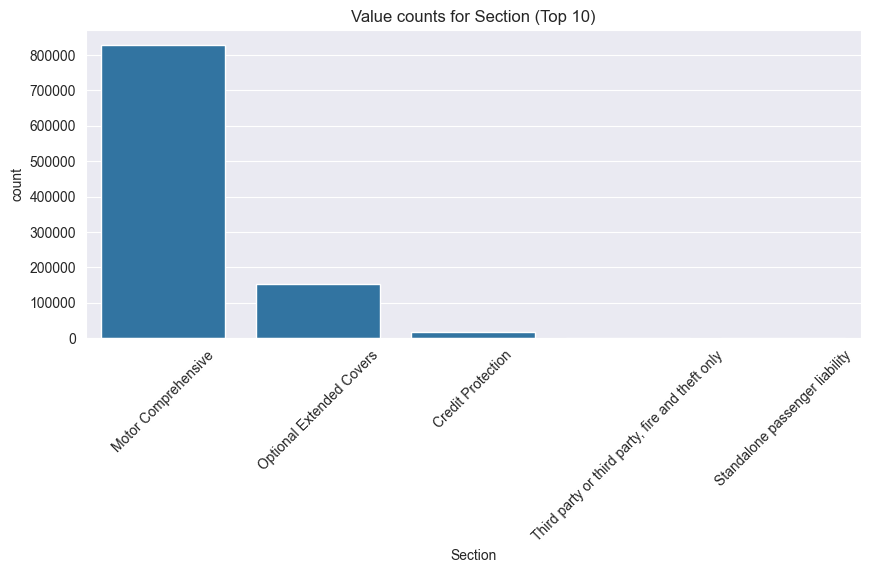

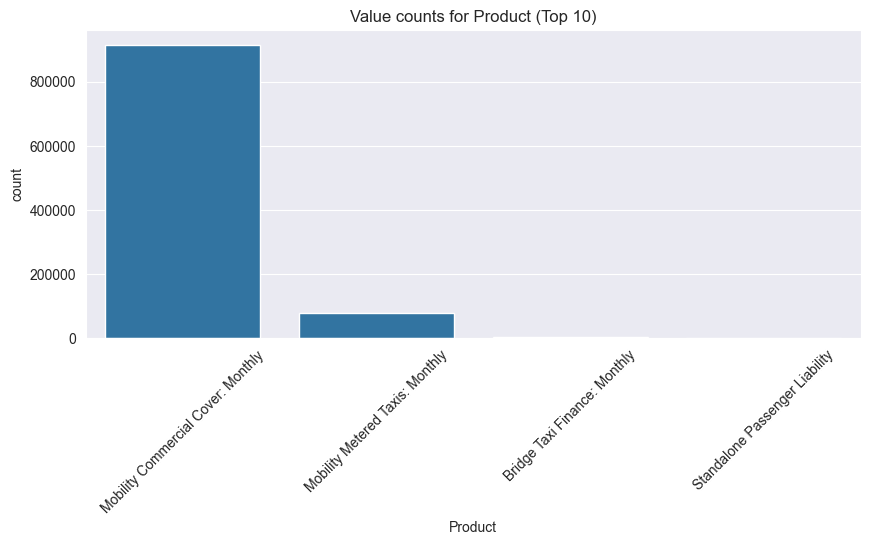

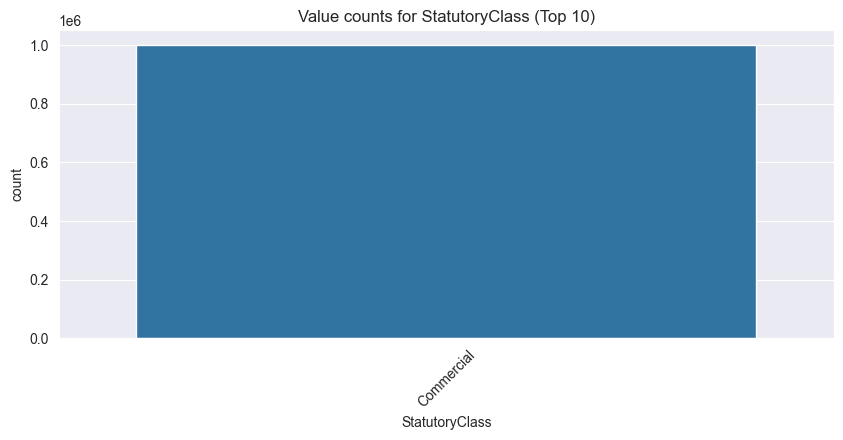

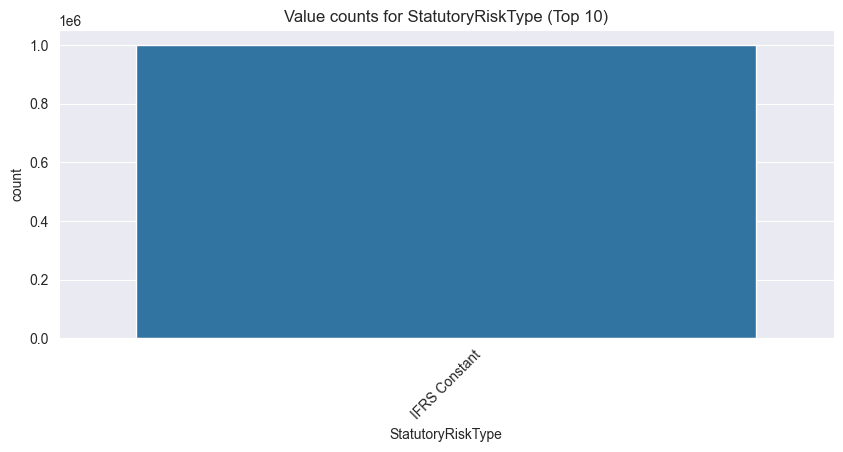

In [8]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f'Value counts for {col} (Top 10)')
    plt.xticks(rotation=45)
    plt.show()